In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data1=pd.read_csv("raw_data.csv")

In [4]:
data1.head()

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [5]:
data2=pd.read_csv("transformed_data.csv")

In [6]:
data2.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [7]:
data2["COUNTRY"].value_counts()

Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: COUNTRY, Length: 210, dtype: int64

In [8]:
len(data2["COUNTRY"].unique())

210

In [9]:
data2["COUNTRY"].value_counts().mode()

0    294
Name: COUNTRY, dtype: int64

# Creating a Dataset to work upon

In [10]:
code=data2["CODE"].unique().tolist()

In [11]:
country=data2["COUNTRY"].unique().tolist()
hdi=[]
tc=[]
td=[]
sti=[]
population=data2["POP"].unique().tolist()
gdp=[]

In [14]:
#loc is used to select the column with name
for i in country:
    hdi.append((data2.loc[data2["COUNTRY"]==i,"HDI"]).sum()/len(data2["COUNTRY"]==i))
    tc.append((data1.loc[data1["location"]==i,"total_cases"]).sum())
    td.append((data1.loc[data1["location"]== i, "total_deaths"]).sum())
    sti.append((data2.loc[data2["COUNTRY"] == i, "STI"]).sum()/294)
    population.append((data1.loc[data1["location"] == i, "population"]).sum()/len(data1["location"] == i))
    
    aggregated_data = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)), 
                               columns = ["Country Code", "Country", "HDI", 
                                          "Total Cases", "Total Deaths", 
                                          "Stringency Index", "Population"])
print(aggregated_data.head())

  Country Code      Country       HDI  Total Cases  Total Deaths  \
0          AFG  Afghanistan  0.002904    5126433.0      165875.0   
1          ALB      Albania  0.003503    1071951.0       31056.0   
2          DZA      Algeria  0.004397    4893999.0      206429.0   
3          AND      Andorra  0.003846     223576.0        9850.0   
4          AGO       Angola  0.002443     304005.0       11820.0   

   Stringency Index  Population  
0          3.049673   17.477233  
1          3.005624   14.872537  
2          3.195168   17.596309  
3          2.677654   11.254996  
4          2.965560   17.307957  


In [15]:
data=aggregated_data.sort_values(by=["Total Cases"], ascending=False)

In [16]:
data.head()

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population
200,USA,United States,0.005388,746014098.0,26477574.0,3.350949,19.617637
27,BRA,Brazil,0.004426,425704517.0,14340567.0,3.136028,19.174732
90,IND,India,0.003732,407771615.0,7247327.0,3.610552,21.045353
157,RUS,Russia,0.004758,132888951.0,2131571.0,3.380088,18.798668
150,PER,Peru,0.003496,74882695.0,3020038.0,3.430126,17.311165


## Top 10 Countries with highest covid 19 cases

In [18]:
data=data.head(10)

## Analyzing the Spread of Covid-19 

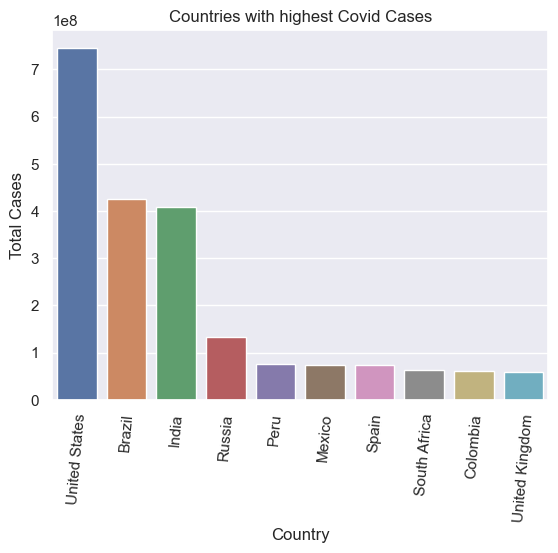

In [25]:
sns.set(style="darkgrid")
bar=sns.barplot(x="Country",y="Total Cases",data=data)
bar.set_xticklabels(bar.get_xticklabels(),rotation=85)
plt.title("Countries with highest Covid Cases")
plt.show()

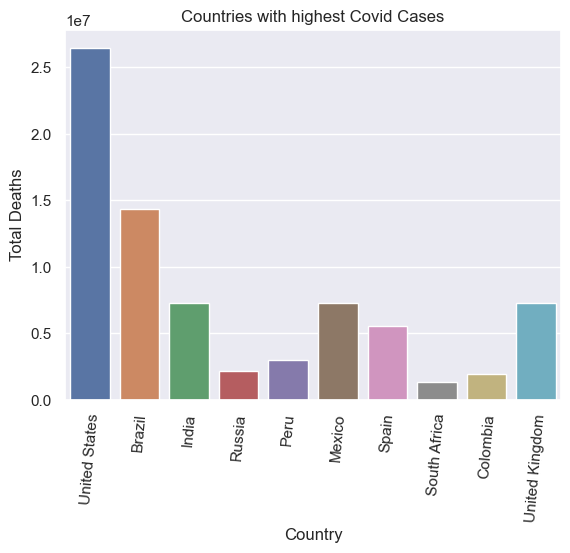

In [26]:
sns.set(style="darkgrid")
bar=sns.barplot(x="Country",y="Total Deaths",data=data)
bar.set_xticklabels(bar.get_xticklabels(),rotation=85)
plt.title("Countries with highest Covid Cases")
plt.show()

### Death Rate

In [27]:
death_rate=(data["Total Deaths"].sum() / data["Total Cases"].sum())*100
print("Death Rate:",death_rate)

Death Rate: 3.6144212045653767


# Analyzing the Impact on Economy

### The data in the given dataset was not clear enough so the data taken is from google

In [28]:
data["GDP Before"]=[65279.53, 8897.49, 2100.75,11497.65, 7027.61, 9946.03,29564.74, 6001.40, 6424.98, 42354.41]
data["GDP After"]=[63543.58, 6796.84, 1900.71,10126.72, 6126.87, 8346.70,27057.16, 5090.72, 5332.77, 40284.64]

In [29]:
data.head()

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population,GDP Before,GDP After
200,USA,United States,0.005388,746014098.0,26477574.0,3.350949,19.617637,65279.53,63543.58
27,BRA,Brazil,0.004426,425704517.0,14340567.0,3.136028,19.174732,8897.49,6796.84
90,IND,India,0.003732,407771615.0,7247327.0,3.610552,21.045353,2100.75,1900.71
157,RUS,Russia,0.004758,132888951.0,2131571.0,3.380088,18.798668,11497.65,10126.72
150,PER,Peru,0.003496,74882695.0,3020038.0,3.430126,17.311165,7027.61,6126.87


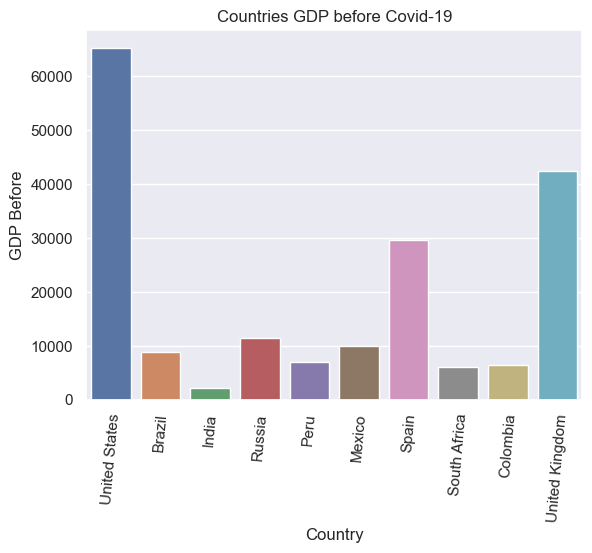

In [30]:
sns.set(style="darkgrid")
bar=sns.barplot(x="Country",y="GDP Before",data=data)
bar.set_xticklabels(bar.get_xticklabels(),rotation=85)
plt.title("Countries GDP before Covid-19")
plt.show()

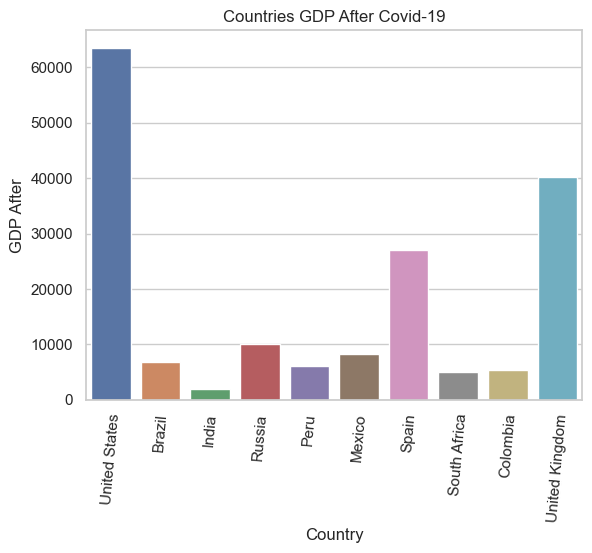

In [31]:
sns.set(style="whitegrid")
bar=sns.barplot(x="Country",y="GDP After",data=data)
bar.set_xticklabels(bar.get_xticklabels(),rotation=85)
plt.title("Countries GDP After Covid-19")
plt.show()

# CONCLUSION

In this project, we studied the spread of covid-19 among the countries and its impact on the global economy. We saw that the outbreak of covid-19 resulted in the highest number of covid-19 cases and deaths in the united states.
We also compared the GDP of countries before and after the Impact of Covid-19.